<a href="https://colab.research.google.com/github/spps-supalerk/PageRankSpectralClustering/blob/main/DataMining_Social_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import pickle as plk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
def text_prep(df, col):
  from nltk.tokenize import word_tokenize
  import nltk
  nltk.download('punkt')
  nltk.download('stopwords')
  nltk.download('wordnet')
  from nltk.tokenize import word_tokenize
  from nltk.corpus import stopwords
  from nltk.stem import WordNetLemmatizer
   
  df_clean = df.copy()
  col_new = col+'_new'

  # make lower case
  df_clean[col_new] = df_clean[col].str.lower()

  # remove punctuation
  df_clean[col_new] = df_clean[col_new].str.replace('[^\w\s]','')

  # text tokenization
  df_clean[col_new] = df_clean[col_new].apply(word_tokenize)

  # create lst of English stopwords
  stop_words = stopwords.words('english') 

  # remove stopwords from tokenize
  df_clean['tokenize'] = df_clean[col_new].apply(lambda x: [ word for word in x if word not in stop_words and word[0].isalpha() ])

  # lemmatizing
  lemmatizer = WordNetLemmatizer() 
  df_clean['tokenize'] = df_clean['tokenize'].apply(lambda x: [ lemmatizer.lemmatize(word) for word in x ] )
  df_clean.drop(columns = col_new, inplace = True)

  return df_clean

In [ ]:
file_path = '/content/drive/My Drive/Big Data Analytics & Social/metadata_ds_86k.csv'
df = pd.read_csv(file_path, dtype = {'id':str})
# abstract_df = df.set_index('id')[['abstract']]
df = df[df['cs.SI'] == True]
# df = df.sample(frac=1)
# df['id'] = df['id'].astype(str)
title_df = df.set_index('id')[['title']]
title_df.head()

,title
id,
0710.4982,First to Market is not Everything: an Analysis...
0803.2443,"Discrete stochastic processes, replicator and ..."
0806.4168,Established Clustering Procedures for Network ...
0807.1550,Discernment of Hubs and Clusters in Socioecono...
0809.0522,The first-mover advantage in scientific public...


In [ ]:
title_df.shape

(6832, 1)

In [ ]:
# abstract_clean = text_prep(abstract_df, col = 'abstract')
# abstract_clean.head()

In [ ]:
title_clean = text_prep(title_df, col = 'title')
title_clean['tokenize'] = title_clean['tokenize'].apply(lambda x: ' '.join(x))
title_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,tokenize
id,,
0710.4982,First to Market is not Everything: an Analysis...,first market everything analysis preferential ...
0803.2443,"Discrete stochastic processes, replicator and ...",discrete stochastic process replicator fokkerp...
0806.4168,Established Clustering Procedures for Network ...,established clustering procedure network analysis
0807.1550,Discernment of Hubs and Clusters in Socioecono...,discernment hub cluster socioeconomic network
0809.0522,The first-mover advantage in scientific public...,firstmover advantage scientific publication


# CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(title_clean['tokenize'])
bow_df = pd.DataFrame(bow.toarray() , columns = vectorizer.get_feature_names())
bow_df.iloc[:5,:5]

,a4nt,aaep,ab,abbreviation,abcd
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [ ]:
idx = range(0,110,10)
found = []
w_appear = bow_df.sum()
for i in idx:
  found.append(sum(w_appear >= i))

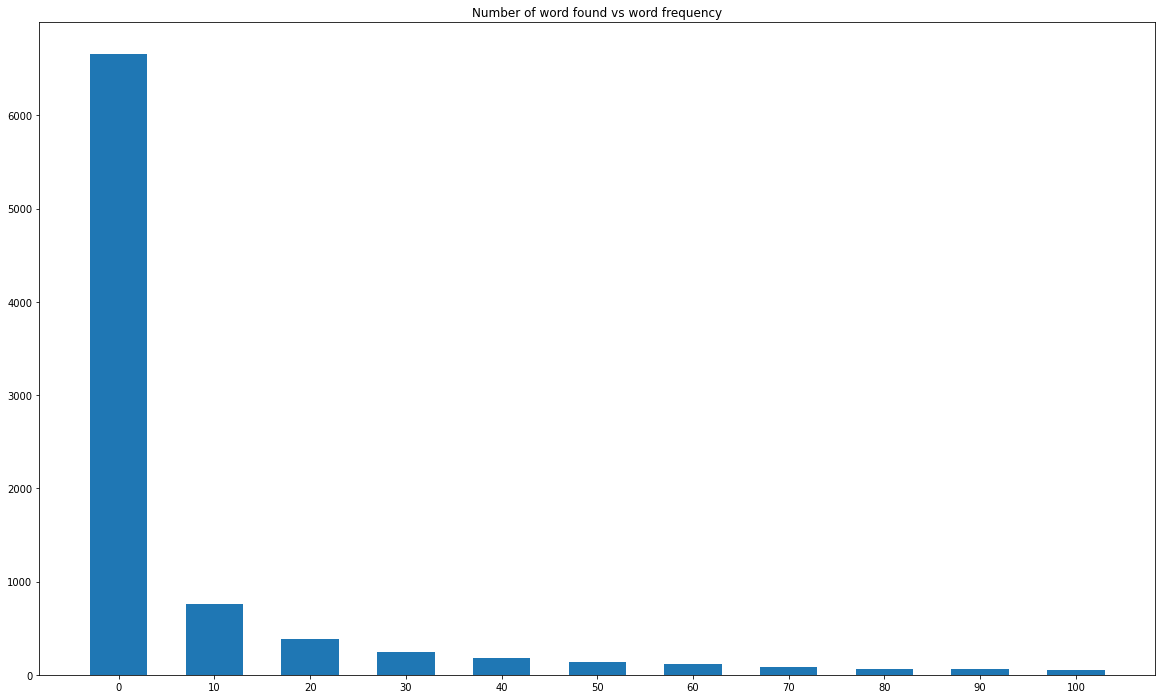

In [ ]:
plt.figure(figsize=(20,12))
plt.bar(idx, found, width  = 6)
plt.xticks(idx)
plt.title('Number of word found vs word frequency')
plt.show()

In [ ]:
bow_df.max().argmax()

785

In [ ]:
bow_df.columns[785]

'centrality'

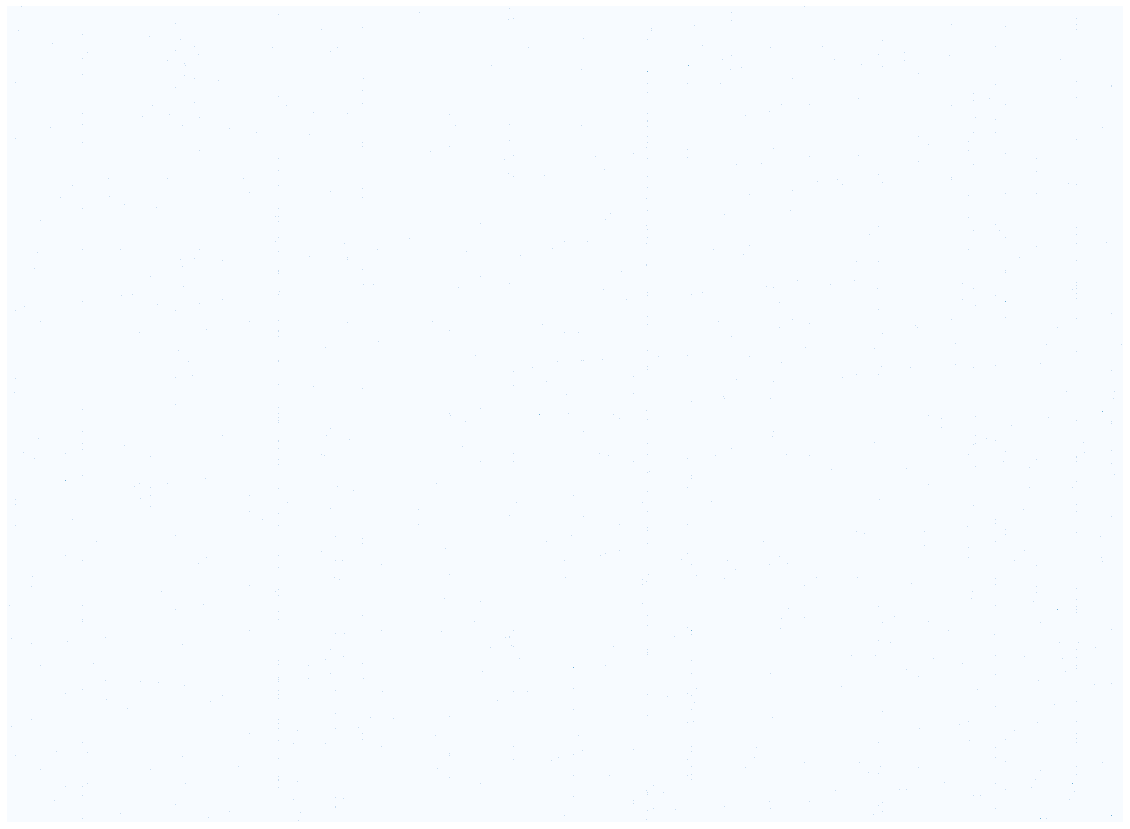

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(bow_df, cbar = False, cmap = 'Blues', yticklabels= False, xticklabels = False)

In [ ]:
col = bow_df.columns[bow_df.sum()>=10]
bow_df = bow_df[col]
bow_df['id'] = title_df.index
bow_df = bow_df.melt(id_vars = 'id', var_name= 'word', value_name= 'count')
bow_df = bow_df[bow_df['count']>0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  after removing the cwd from sys.path.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.


In [ ]:

bow_df.head()

,id,word,count
818,1207.68,abuse,1
1985,1408.39,abuse,1
2362,1503.04,abuse,1
3228,1605.03,abuse,1
3990,1704.03,abuse,1


In [ ]:
bow_df.to_csv('/content/drive/My Drive/Big Data Analytics & Social/SI_freq.csv', index=False)

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
bow_df = vectorizer.fit_transform(title_clean['tokenize'])
bow_df = pd.DataFrame(bow_df.toarray() , columns = vectorizer.get_feature_names())
check0 = bow_df.sum()
bow_df.shape

(6832, 6662)

In [ ]:
# check0 = bow_df.sum()
idx = range(0,20)
tfidf_val = []
check0 = check0.sort_values()
for i in idx:
  tfidf_val.append(sum(check0 >= i))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 20.0)

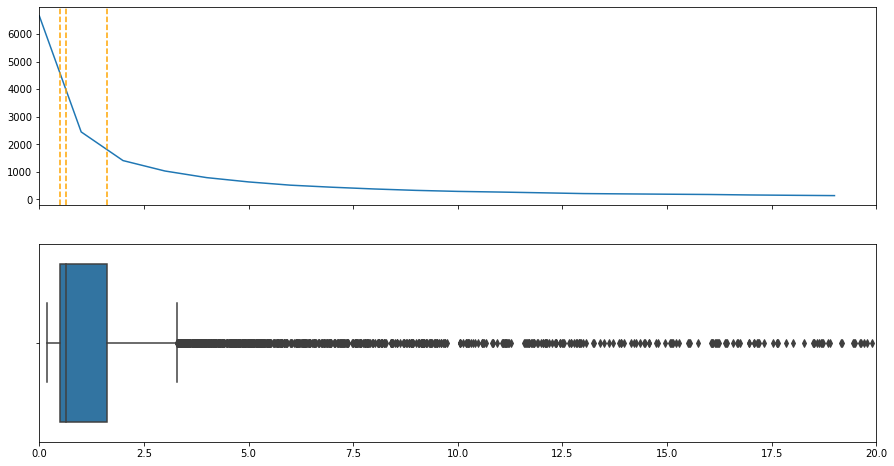

In [ ]:
fig, ax = plt.subplots(2,1, sharex = True, figsize=(15,8))
sns.lineplot(x = idx, y = tfidf_val, ax = ax[0])
sns.boxplot(check0, ax=ax[1])

for vl in [check0.quantile(0.25), check0.median(), check0.quantile(0.75)]:
  ax[0].axvline(x=vl, color = 'orange', linestyle = '--' )
plt.xlim(0,20)

In [ ]:
bow_df['id'] = title_df.index
bow_df_melt = bow_df.melt(id_vars = 'id', var_name= 'word', value_name= 'tfidf')
bow_df_melt = bow_df_melt[bow_df_melt['tfidf'] > 0 ]
bow_df_melt.head()

,id,word,tfidf
4463,1711.0192100000002,a4nt,0.407380
9372,1506.0173,aaep,0.471613
18065,1710.03855,ab,0.590727
20441,2002.05819,ab,0.411420
22934,1504.04884,abbreviation,0.523082


In [ ]:
bow_df_melt.to_csv('/content/drive/My Drive/Big Data Analytics & Social/SI_tfidf.csv', index=False)

<Figure size 864x576 with 0 Axes>

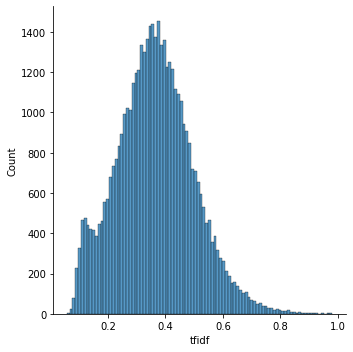

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(bow_df_melt['tfidf'])
plt.show()

# Pairwise Cosine

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(title_clean['tokenize'])
bow_df = pd.DataFrame(bow.toarray() , columns = vectorizer.get_feature_names())
bow_df.head()

,a4nt,aaep,ab,abbreviation,abcd,abordagem,abrupt,absence,absent,absolute,absorbing,absorption,abstract,abuse,abusive,academia,academic,accelerate,accelerated,accelerates,accelerating,access,accessed,accessibility,accessible,accidental,accommodation,according,account,accountable,accounting,accumulated,accumulation,accuracy,accurate,accurately,achievability,achieve,achieving,acm,...,worldwide,worstcase,worth,wrangling,write,writing,written,wroclaw,wrong,wrt,wsdm,www,xavi,yahoo,yankee,yasca,year,yelp,yet,yield,york,youll,young,youre,youtube,youtubes,z_2,zaklan,zealot,zealotry,zebralancer,zero,zeta,zillow,zipfs,zlaplacian,zombie,zooming,zorro,zscorebased
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bow_df.shape

(6832, 6662)

In [ ]:
cosine_df = pd.DataFrame(cosine_similarity(bow_df,dense_output=False), index= title_clean.index, columns = title_clean.index ).reset_index()
cosine_df.head()

id,id,0710.4982,0803.2443,0806.4168,0807.1550,0809.0522,0809.2768,0903.2792,0903.3623,0904.4863,0906.0060,0906.4675,0907.2393,0910.5516,0911.2280,0912.0238,1001.3181,1003.3384,1004.1729,1004.4704,1005.2704,1005.5718,1006.0234,1006.2125,1007.2876,1007.4440,1008.0042,1008.1357,1008.1516,1008.1770,1008.2005,1008.2565,1008.3443,1008.3800,1008.3926,1008.4115,1008.4564,1008.4916,1009.0119,1009.0240,...,2002.07791,2002.07803,2002.07833,2002.07917,2002.08082,2002.08233,2002.08312,2002.08491,2002.08554,2002.09165,2002.09202,2002.09366,2002.09460,2002.09485,2002.09523,2002.09803,2002.09846,2002.09943,2002.10522,2002.10992,2002.11193,2002.11320,2002.11522,2002.11621,2002.11636,2002.11645,2002.11679,2002.11765,2002.11809,2002.12056,2002.12147,2002.12309,2002.12501,2002.12612,2002.12683,2002.12733,cs/0009005,cs/0204001,cs/0607062,cs/0703136
0,0710.4982,1.000000,0.0,0.169031,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.154303,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.133631,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.113961,0.0000,0.000000,0.0,0.000000,0.000000,0.109109,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0803.2443,0.000000,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.123091,0.0,0.000000,0.13484,0.100504,0.000000,0.000000,0.000000,0.150756,0.123091,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.13484,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.100504,0.000000,0.000000,0.1066,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.227921,0.0,0.0,0.095346,0.0,0.13484,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0806.4168,0.169031,0.0,1.000000,0.2,0.0,0.182574,0.0,0.0,0.158114,0.158114,0.223607,0.13484,0.182574,0.0,0.0,0.149071,0.000000,0.0,0.158114,0.00000,0.000000,0.223607,0.141421,0.169031,0.000000,0.000000,0.223607,0.182574,0.258199,0.365148,0.2,0.2,0.258199,0.20000,0.149071,0.223607,0.2,0.316228,0.0,...,0.0,0.182574,0.0,0.0,0.0,0.0,0.141421,0.0,0.182574,0.0,0.0,0.149071,0.182574,0.269680,0.0000,0.149071,0.0,0.316228,0.158114,0.387298,0.0,0.2,0.158114,0.0,0.0,0.0,0.169031,0.169031,0.0,0.0,0.141421,0.0,0.00000,0.0,0.119523,0.0,0.0,0.0,0.0,0.258199
3,0807.1550,0.000000,0.0,0.200000,1.0,0.0,0.547723,0.0,0.0,0.158114,0.158114,0.223607,0.13484,0.182574,0.0,0.0,0.149071,0.000000,0.0,0.158114,0.00000,0.000000,0.223607,0.141421,0.000000,0.000000,0.000000,0.223607,0.182574,0.258199,0.182574,0.2,0.2,0.258199,0.20000,0.149071,0.223607,0.2,0.158114,0.0,...,0.0,0.182574,0.0,0.0,0.0,0.0,0.141421,0.0,0.182574,0.0,0.0,0.149071,0.000000,0.134840,0.0000,0.149071,0.0,0.158114,0.158114,0.258199,0.0,0.2,0.158114,0.0,0.0,0.0,0.169031,0.169031,0.0,0.0,0.141421,0.0,0.00000,0.0,0.119523,0.0,0.0,0.0,0.0,0.258199
4,0809.0522,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000


In [ ]:
cosine_df.rename(columns = {'id':'doc1'}, inplace = True)
cosine_df2 = cosine_df.melt(id_vars = 'doc1', var_name = 'doc2', value_name= 'cosine')
cosine_df2['doc1'] = cosine_df2['doc1'].astype(str)
cosine_df2['doc2'] = cosine_df2['doc2'].astype(str)
cosine_df2.head()

,doc1,doc2,cosine
0,0710.4982,0710.4982,1.000000
1,0803.2443,0710.4982,0.000000
2,0806.4168,0710.4982,0.169031
3,0807.1550,0710.4982,0.000000
4,0809.0522,0710.4982,0.000000


In [ ]:
cosine_df2.shape

(46676224, 3)

In [ ]:
cosine_df2['cosine'].value_counts(bins=10)

(-0.002, 0.1]    34067590
(0.1, 0.2]        9243924
(0.2, 0.3]        2476172
(0.3, 0.4]         674764
(0.4, 0.5]         171238
(0.5, 0.6]          29512
(0.9, 1.0]           6852
(0.6, 0.7]           5040
(0.7, 0.8]            962
(0.8, 0.9]            170
Name: cosine, dtype: int64

In [ ]:
# cosine_df2.to_csv('/content/drive/My Drive/Big Data Analytics & Social/SI_cosine_uncut.csv', index=False)

In [ ]:
cosine_df2 = pd.read_csv('/content/drive/My Drive/Big Data Analytics & Social/SI_cosine_uncut.csv')
cosine_df2.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,doc1,doc2,cosine
0,710.4982,710.498,1.000000
1,803.2443,710.498,0.000000
2,806.4168,710.498,0.169031
3,807.155,710.498,0.000000
4,809.0522,710.498,0.000000


In [ ]:
cosine_df3 = cosine_df2[(cosine_df2['cosine']>0) & (cosine_df2['doc1']!=cosine_df2['doc2'])]
cosine_df3.shape

(12922432, 3)

In [ ]:
cosine_df3.head()

,doc1,doc2,cosine
0,710.4982,710.498,1.000000
2,806.4168,710.498,0.169031
23,1007.2876,710.498,0.142857
29,1008.2005,710.498,0.154303
37,1009.0119,710.498,0.133631


In [ ]:
# cosine_df3['doc1'] = cosine_df3['doc1'].astype(str)
# cosine_df3['doc2'] = cosine_df3['doc2'].astype(str) 
cosine_df3['doc_sort1'] = cosine_df3.apply(lambda x: min(x['doc1'], x['doc2']), axis = 1)
cosine_df3['doc_sort2'] = cosine_df3.apply(lambda x: max(x['doc1'], x['doc2']), axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
cosine_df3['doc1'] = cosine_df3['doc_sort1']
cosine_df3['doc2'] = cosine_df3['doc_sort2']
cosine_df3.drop(columns = ['doc_sort1', 'doc_sort2'], inplace = True)
cosine_df3.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

(12922432, 3)

In [ ]:
cosine_df4 = cosine_df3.drop_duplicates(keep = 'first')
cosine_df4.shape

(6461216, 3)

In [ ]:
cosine_df4.to_csv('/content/drive/My Drive/Big Data Analytics & Social/SI_cosine_cut.csv', index=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

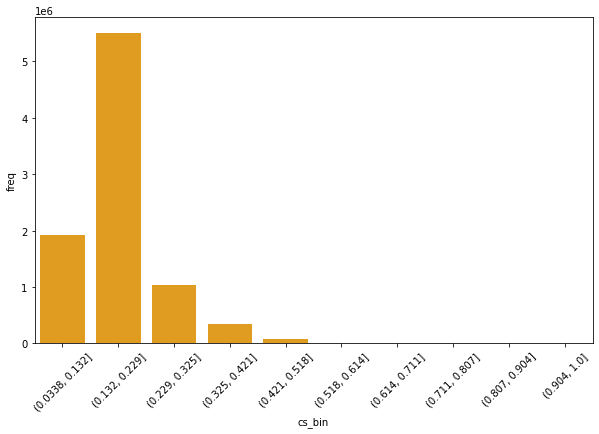

In [ ]:
box = cosine_df4['cosine'].value_counts(bins=10).to_frame().sort_index().reset_index()
box.columns = ['cs_bin','freq']

plt.figure(figsize=(10,6))
sns.barplot(x='cs_bin', y='freq', data = bar, color = 'orange')
plt.xticks(rotation=45) 


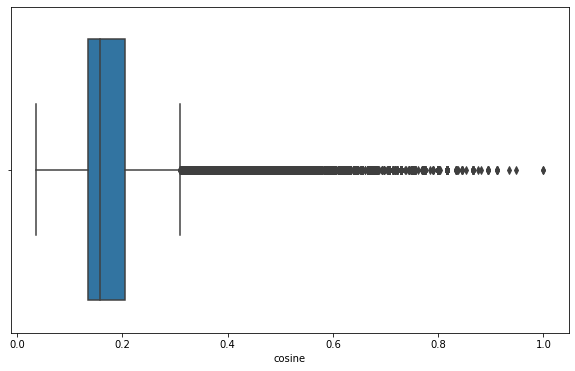

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = cosine_df4, x='cosine')

In [ ]:
bar

,cs_bin,freq
0,"(0.0338, 0.132]",1924688
1,"(0.132, 0.229]",5505975
2,"(0.229, 0.325]",1033590
3,"(0.325, 0.421]",340928
4,"(0.421, 0.518]",77704
5,"(0.518, 0.614]",13093
6,"(0.614, 0.711]",2395
7,"(0.711, 0.807]",465
8,"(0.807, 0.904]",98
9,"(0.904, 1.0]",6802


In [ ]:
cosine_df4.head()

,doc1,doc2,cosine
2,710.4982,806.4168,0.169031
23,1007.2876,710.4982,0.142857
29,1008.2005,710.4982,0.154303
37,1009.0119,710.4982,0.133631
65,1010.3003,710.4982,0.169031


In [ ]:
cosine_df4[(cosine_df4['doc1']!= cosine_df4['doc2'])&(cosine_df4['cosine']==1)].head(20)

,doc1,doc2,cosine


# LDA

In [ ]:
from gensim.corpora import Dictionary
from gensim import corpora, models
import gensim

In [ ]:
dictionary = Dictionary(abstract_clean['tokenize'])
print(len(dictionary))

112065


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.9, keep_n=20000)

In [ ]:
len(dictionary)

10465

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in abstract_clean['tokenize']]

In [ ]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [ ]:
dir(corpus_tfidf)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_load_specials',
 '_save_specials',
 '_smart_save',
 'chunksize',
 'corpus',
 'load',
 'metadata',
 'obj',
 'save',
 'save_corpus']

In [ ]:
corpus_tfidf.obj

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=dictionary, passes=2, workers=2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.076*"gradient" + 0.043*"speech" + 0.039*"recognition" + 0.036*"stochastic" + 0.034*"descent" + 0.022*"interpretable" + 0.021*"using" + 0.021*"deep" + 0.019*"network" + 0.016*"neural"
Topic: 1 
Words: 0.067*"estimation" + 0.030*"robustness" + 0.028*"regression" + 0.021*"model" + 0.019*"via" + 0.015*"learning" + 0.014*"privacy" + 0.014*"distribution" + 0.013*"density" + 0.013*"linear"
Topic: 2 
Words: 0.048*"learning" + 0.040*"process" + 0.039*"gaussian" + 0.037*"domain" + 0.029*"feature" + 0.029*"deep" + 0.028*"adaptation" + 0.024*"unsupervised" + 0.022*"using" + 0.017*"classification"
Topic: 3 
Words: 0.068*"inference" + 0.053*"variational" + 0.032*"question" + 0.032*"model" + 0.027*"autoencoders" + 0.020*"answering" + 0.019*"transformer" + 0.019*"system" + 0.018*"reasoning" + 0.017*"detection"
Topic: 4 
Words: 0.033*"model" + 0.032*"language" + 0.032*"local" + 0.028*"ai" + 0.026*"probabilistic" + 0.024*"endtoend" + 0.024*"logic" + 0.024*"programming" + 0.019*"search

# Universal Sentence Encoder

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
#download the model to local so it can be used again and again
!mkdir ../sentence_wise_email/module/module_useT
# Download the module, and uncompress it to the destination folder. 
!curl -L "https://tfhub.dev/google/universal-sentence-encoder-large/3?tf-hub-format=compressed" | tar -zxvC ../sentence_wise_email/module/module_useT

# Community detection

In [ ]:
cs_df = pd.read_csv('/content/drive/My Drive/Big Data Analytics & Social/SI_cosine_cut.csv', dtype = {'doc1':str,'doc2':str})
cs_df.head()

,doc1,doc2,cosine
0,0710.4982,0806.4168,0.169031
1,0710.4982,1007.2876,0.142857
2,0710.4982,1008.2005,0.154303
3,0710.4982,1009.0119,0.133631
4,0710.4982,1010.3003,0.169031


In [ ]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461216 entries, 0 to 6461215
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   doc1    object 
 1   doc2    object 
 2   cosine  float64
dtypes: float64(1), object(2)
memory usage: 147.9+ MB


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


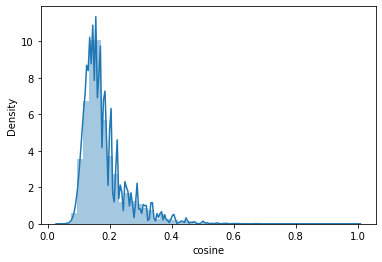

In [ ]:
sns.distplot(cs_df['cosine'])

In [ ]:
cs_df['cosine'].describe()

count    6.461216e+06
mean     1.800348e-01
std      6.926050e-02
min      3.580574e-02
25%      1.336306e-01
50%      1.581139e-01
75%      2.041241e-01
max      1.000000e+00
Name: cosine, dtype: float64

In [ ]:
2.041241e-01

0.2041241

In [ ]:
lst = []
for t in range(1,11):
  temp = cs_df[cs_df['cosine']>= t/10]
  lst.append(temp.shape[0])
tuple(zip(range(1,11), lst))

((1, 6316422),
 (2, 1833597),
 (3, 441656),
 (4, 117716),
 (5, 23647),
 (6, 3756),
 (7, 576),
 (8, 95),
 (9, 10),
 (10, 2))

In [ ]:
thres = 0.5
cs_df05 = cs_df[cs_df['cosine']>=0.5]
cs_df05.head()

,doc1,doc2,cosine
1410,0806.4168,1104.4605,0.516398
2145,0806.4168,1401.3516,0.516398
3129,0806.4168,1612.00895,0.596285
3263,0806.4168,1704.03913,0.516398
3937,0806.4168,1812.05908,0.526235


In [ ]:
#get doc name
cs_df05 = cs_df05.merge(title_df.reset_index(), left_on ='doc1', right_on = 'id', how='left')
cs_df05 = cs_df05.merge(title_df.reset_index(), left_on ='doc2', right_on = 'id', how='left')
cs_df05.head()

,doc1,doc2,cosine,id_x,title_x,id_y,title_y
0,0806.4168,1104.4605,0.516398,0806.4168,Established Clustering Procedures for Network ...,1104.4605,Compressive Network Analysis
1,0806.4168,1401.3516,0.516398,0806.4168,Established Clustering Procedures for Network ...,1401.3516,Clustering Evolving Networks
2,0806.4168,1612.00895,0.596285,0806.4168,Established Clustering Procedures for Network ...,1612.00895,Motif Clustering and Overlapping Clustering fo...
3,0806.4168,1704.03913,0.516398,0806.4168,Established Clustering Procedures for Network ...,1704.03913,Higher-order clustering in networks
4,0806.4168,1812.05908,0.526235,0806.4168,Established Clustering Procedures for Network ...,1812.05908,Social Network Analysis: Bibliographic Network...


In [ ]:
cs_df05.drop(columns = ['id_x','id_y'],inplace=True)
cs_df05.columns = ['doc1','doc2', 'cosine', 'title_doc1', 'title_doc2']

In [ ]:
cs_df05.shape

(23647, 5)

In [ ]:
unq_doc1 = list(cs_df05['doc1'].unique())
unq_doc2 = list(cs_df05['doc2'].unique())
unq_alldoc = list(set(unq_doc1 + unq_doc2))
len(unq_alldoc)

3865

In [ ]:
cs_df05['doc2'].head().values

array(['1104.4605', '1401.3516', '1612.00895', '1704.03913', '1812.05908'],
      dtype=object)

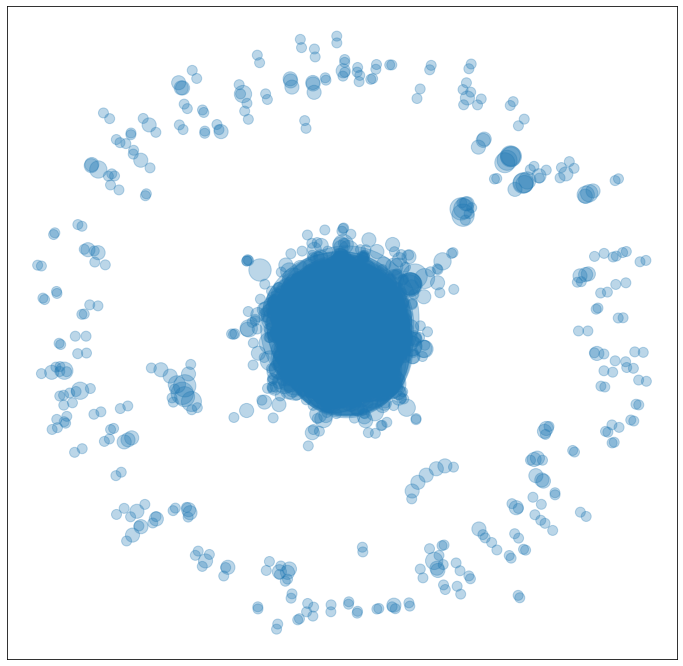

In [ ]:
import networkx as nx
plt.figure(figsize=(12,12))

G=nx.MultiGraph()
G.add_nodes_from(unq_alldoc)

for d1, d2, cs in zip(cs_df05['doc1'],cs_df05['doc2'],cs_df05['cosine']):
  G.add_edge(d1, d2, weight=cs)
d = dict(G.degree)
nx.draw_networkx_nodes(G,
                       pos=nx.spring_layout(G),
                       node_size=[v * 100 for v in d.values()], 
                       alpha = 0.3)

EdgeDataView([(0, 1, {}), (1, 2, {})])

In [ ]:
def filter_thres_plot(cs_df, thres=0.5):
  cs_df = cs_df[cs_df['cosine']>=thres]
  plt.figure(figsize=(12,12))

  G=nx.MultiGraph()
  G.add_nodes_from(unq_alldoc)

  for d1, d2, cs in zip(cs_df['doc1'],cs_df['doc2'],cs_df['cosine']):
    G.add_edge(d1, d2, weight=cs)
  d = dict(G.degree)
  
  plt.title(f'Paper title similarity cosine >= {thres}')
  nx.draw_networkx_nodes(G,
                        pos=nx.spring_layout(G),
                        node_size=[v * 100 for v in d.values()], 
                        alpha = 0.3)
  
  

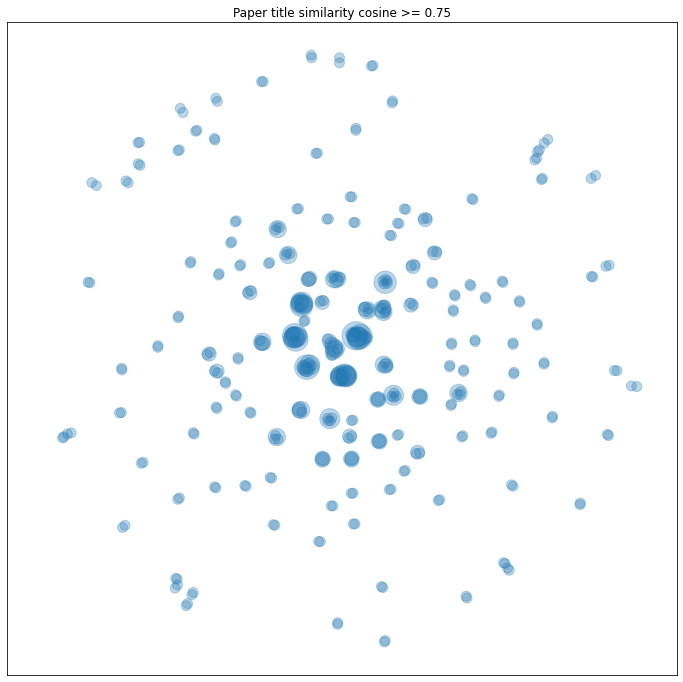

In [ ]:
filter_thres_plot(cs_df, thres = 0.75)

In [ ]:
cs_df05.head()

,doc1,doc2,cosine,title_doc1,title_doc2
0,0806.4168,1104.4605,0.516398,Established Clustering Procedures for Network ...,Compressive Network Analysis
1,0806.4168,1401.3516,0.516398,Established Clustering Procedures for Network ...,Clustering Evolving Networks
2,0806.4168,1612.00895,0.596285,Established Clustering Procedures for Network ...,Motif Clustering and Overlapping Clustering fo...
3,0806.4168,1704.03913,0.516398,Established Clustering Procedures for Network ...,Higher-order clustering in networks
4,0806.4168,1812.05908,0.526235,Established Clustering Procedures for Network ...,Social Network Analysis: Bibliographic Network...


Name: Paper Community Detection cosine sim >= 0.5
Type: Graph
Number of nodes: 3865
Number of edges: 23647
Average degree:  12.2365


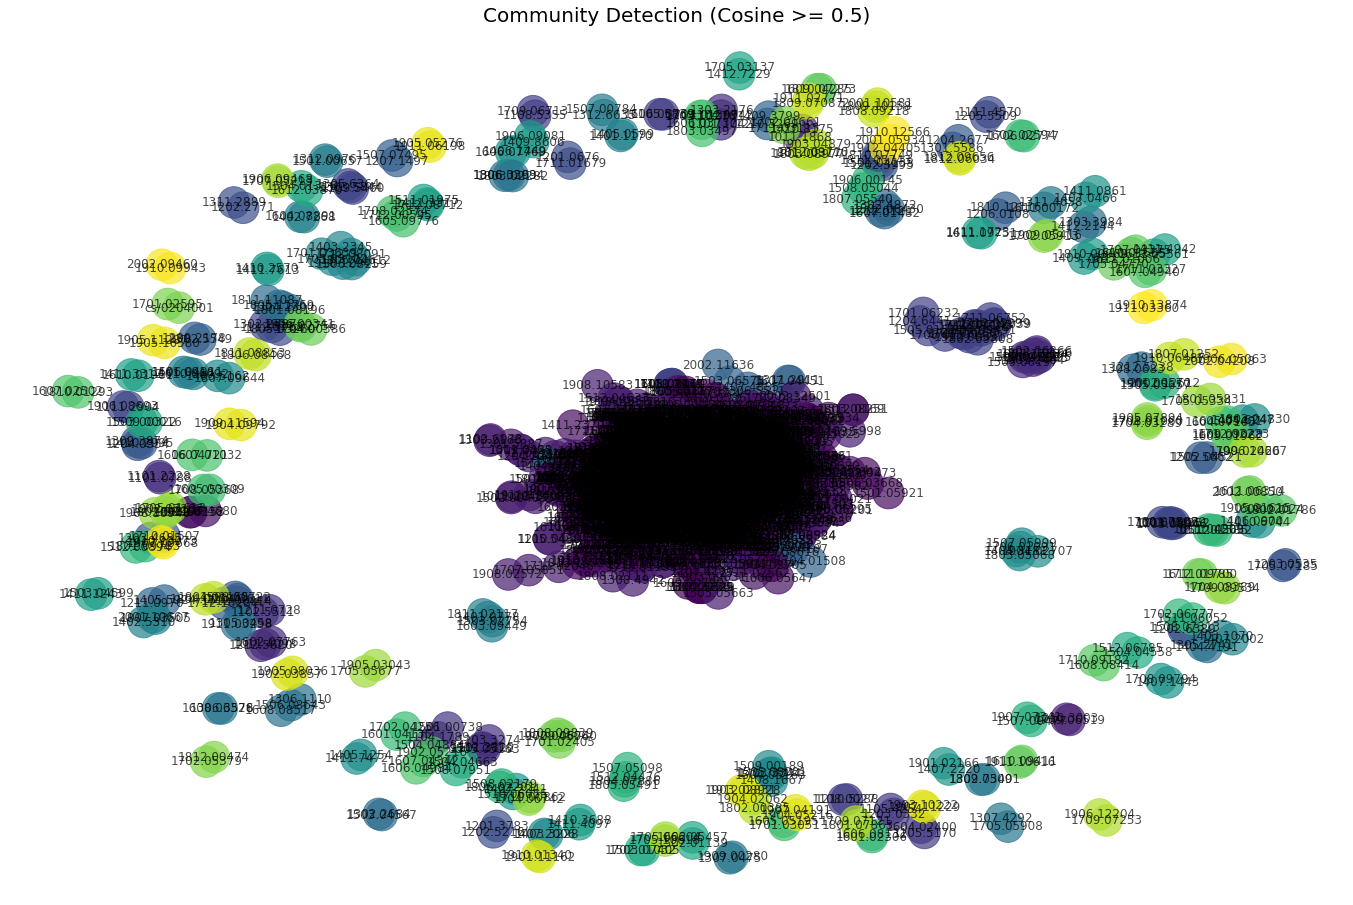

In [ ]:
import community

thres = 0.5
temp_df = cs_df[cs_df['cosine']>=thres]
G = nx.convert_matrix.from_pandas_edgelist(temp_df, source='doc1', target='doc2')
G.name = f'Paper Community Detection cosine sim >= {thres}'
print(nx.info(G))


partition = community.best_partition(G, random_state=0)
position = nx.spring_layout(G)
values = [partition.get(node) for node in G.nodes()]
plt.figure(figsize=(24,16))
nx.draw_networkx(G,
                 position,
                 cmap=plt.get_cmap('viridis'),
                 arrows=True,
                 node_color=values, 
                 edge_color='grey',
                 node_size=1000, 
                 with_labels=True, 
                 alpha = 0.7,
                 font_weight='normal')
plt.title(f'Community Detection (Cosine >= {thres})', size=20)
plt.axis('off')
plt.show()

In [ ]:
dir(partition)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [ ]:
partition.items()

dict_items([('0806.4168', 0), ('1104.4605', 1), ('1401.3516', 0), ('1612.00895', 0), ('1704.03913', 0), ('1812.05908', 1), ('0807.1550', 2), ('0809.2768', 2), ('1907.07175', 2), ('0906.0060', 3), ('1008.2565', 3), ('1102.2166', 1), ('1210.0808', 3), ('1308.6356', 3), ('1410.7833', 3), ('1503.07757', 3), ('1702.05427', 1), ('0906.4675', 0), ('1310.3521', 0), ('1610.09048', 0), ('1704.01524', 4), ('1803.06031', 0), ('1908.02520', 0), ('1909.06073', 5), ('0910.5516', 4), ('1010.1523', 4), ('1011.3315', 4), ('1012.2363', 4), ('1103.2596', 4), ('1109.2215', 4), ('1112.1831', 4), ('1205.1997', 4), ('1210.3735', 4), ('1303.0868', 4), ('1305.2006', 4), ('1310.4023', 4), ('1409.7615', 6), ('1411.7864', 7), ('1412.4973', 1), ('1509.06633', 4), ('1601.06307', 4), ('1602.03746', 4), ('1603.05566', 7), ('1605.02288', 4), ('1607.01683', 4), ('1612.02463', 4), ('1709.03135', 4), ('1712.04282', 7), ('1810.05511', 4), ('1909.12201', 4), ('0912.0238', 8), ('1109.4680', 8), ('1603.04153', 8), ('1001.3181

In [ ]:
commu = pd.DataFrame({'community' : [int(i) for i in list(partition.values())]})
commu.shape

(3865, 1)

In [ ]:
commu['community'].value_counts().sort_index()

0      104
1      534
2      459
3      138
4      335
      ... 
175      2
176      2
177      2
178      3
179      2
Name: community, Length: 180, dtype: int64